In [71]:
import random
import numpy as np
import functools
from collections import Counter, defaultdict
import math
import matplotlib.pyplot as pp
from collections import Counter

# Sampling e Estatistica

Vamos começar imaginando que em uma urna com 100 bolinhas, e dessas 50 são da cor azul e 50 da cor vermelha. Se você tirar 10 bolinhas desta urna, quantas serão vermelhas? A maioria das pessoas responderá que 5 serão vermelhas. Vamos verificar!

In [135]:

N = 1000000
bolas_na_urna ={'vermelho':.6*N,'azul':.4*N}
numero_de_bolas_sorteadas = 1000
numero_repeticoes = 1000

In [136]:
urna = []
print(bolas_na_urna)
for key in bolas_na_urna.keys():
    i=0
    while(i < bolas_na_urna[key]):
        urna.append(key)
        i+=1

cont = defaultdict(int)
for i in urna:
    cont[i]+=1
for x,y in cont.items():
    z = y*100./N
    print(f'A urna contem {y} bolas da cor {x}, ou seja {z}%')


bolas_sorteadas = {}
sorteado = []
for i in range(numero_de_bolas_sorteadas):
    sorteado.append(urna[np.random.randint(0,N-1)])
for key in bolas_na_urna.keys():
    bolas_sorteadas[key]=sorteado.count(key)
print('-------------------')
print(f'Ao retirar {numero_de_bolas_sorteadas} bolas aleatoriamente: ')
for x,y in bolas_sorteadas.items():
    z = y*100./numero_de_bolas_sorteadas
    print(f'\t {y} são {x}, ou seja {z}%')



{'vermelho': 600000.0, 'azul': 400000.0}
A urna contem 600000 bolas da cor vermelho, ou seja 60.0%
A urna contem 400000 bolas da cor azul, ou seja 40.0%
-------------------
Ao retirar 1000 bolas aleatoriamente: 
	 608 são vermelho, ou seja 60.8%
	 392 são azul, ou seja 39.2%


# Mas se eu repetir diversas vezes o sorteio?

In [137]:
resultados_diversas_pesquisas={}
for key in bolas_na_urna.keys():
    resultados_diversas_pesquisas[key]=[]



for i in range(numero_repeticoes):
    #random.shuffle(urna)

    bolas_sorteadas = {}
    sorteado = []
    for i in range(numero_de_bolas_sorteadas):
        sorteado.append(urna[np.random.randint(0,N-1)])
    for key in bolas_na_urna.keys():
        bolas_sorteadas[key]=sorteado.count(key)
    for x,y in bolas_sorteadas.items():
        z = y*1./numero_de_bolas_sorteadas
        resultados_diversas_pesquisas[x].append(z)

    

A media do vermelho é 60.0135%
A media do azul é 39.9865%


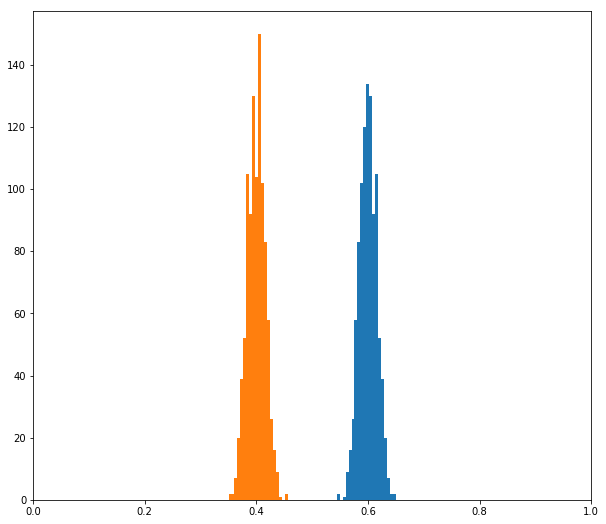

In [138]:
pp.figure(figsize=(10, 9))
for key in bolas_na_urna.keys():
    pp.hist(resultados_diversas_pesquisas[key],20)
    pp.xlim(0,1)
    media_cor = 100.*np.average(resultados_diversas_pesquisas[key])
    print(f'A media do {key} é {media_cor}%')
